In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import proc_cesm_le

In [3]:
v = 'O2'
file_std = os.path.join(diro['out'],'toe_thermocline.%s.std.nc'%v)
ds_std = xr.open_dataset(file_std)
ds_std

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 101, trend_length: 71)
Dimensions without coordinates: nlat, nlon, time, trend_length
Data variables:
    O2_cnt   (time, trend_length, nlat, nlon) float32 0.0 0.0 0.0 0.0 0.0 ...
    O2_std   (time, trend_length, nlat, nlon) float32 nan nan nan nan nan ...
    O2       (time, trend_length, nlat, nlon) float32 nan nan nan nan nan ...

In [4]:
index_ens = 0
files = os.path.join(diro['out'],'toe_thermocline_trends.ens_i_%03d.nc'%index_ens)
ds = xr.open_dataset(files) #,concat_dim='ens',chunks=chunks)
trend_year = ds.time.values
trend_length = ds.trend_length.values
n_trend = len(trend_length)
n_year = len(trend_year)
ds

<xarray.Dataset>
Dimensions:       (nlat: 384, nlon: 320, time: 101, trend_length: 71)
Coordinates:
  * trend_length  (trend_length) int64 10 11 12 13 14 15 16 17 18 19 20 21 ...
  * time          (time) int64 2000 2001 2002 2003 2004 2005 2006 2007 2008 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    O2            (time, trend_length, nlat, nlon) float64 nan nan nan nan ...
    AOU           (time, trend_length, nlat, nlon) float64 nan nan nan nan ...
    O2sat         (time, trend_length, nlat, nlon) float64 nan nan nan nan ...

In [5]:
ds_norm = ds[v] / ds_std[v+'_std']
ds_norm = ds_norm.compute()
ds_norm

<xarray.DataArray (time: 101, trend_length: 71, nlat: 384, nlon: 320)>
array([[[[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]],

        ..., 
        [[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]]],


       ..., 
       [[[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]],

        ..., 
        [[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]]]])
Coordinates:
  * trend_length  (trend_length) int64 10 11 12 13 14 15 16 17 18 19 20 21 ...
  * time          (time) int64 2000 2001 2002 2003 2004 2005 2006 2007 2008 ...
Dimensions without coordinates: nlat, nlon

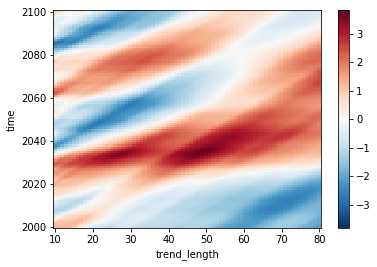

In [16]:
ds_norm[:,:,236,0].plot()

In [35]:
nlat = ds[v].shape[2]
nlon = ds[v].shape[3]

toe = xr.DataArray(np.ones((nlat,nlon)),dims=('nlat','nlon'))
record_length = xr.DataArray(np.ones((nlat,nlon)),dims=('nlat','nlon'))

ncomp = nlat*nlon
n = 0
for i in range(nlon):
    for j in range(nlat):

        if ds_norm[:,:,j,i].isnull().all():
            continue

        detected = (ds_norm[:,:,j,i] <= -2.)       

        toe_x = np.ones(n_trend)
        toe_x[:] = np.nan
        for it in range(n_trend):
            detected_it = detected[:,it]
            detected_it = np.where(np.isnan(detected_it),False,detected_it)
            for l in range(n_year):

                if detected_it[l:].all():
                    toe_x[it] = trend_year[l]
                    break

        if not np.isnan(toe_x).all():                           
            toe.values[j,i] = np.nanmin(toe_x)
            record_length.values[j,i] = trend_length[np.nanargmin(toe_x)]


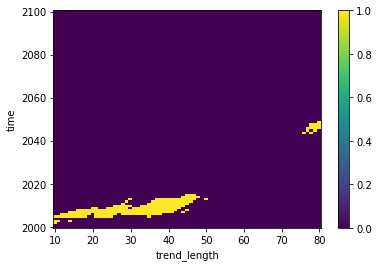

In [32]:
d = (ds_norm[:,:,200,200] <= -2.)
d.plot()

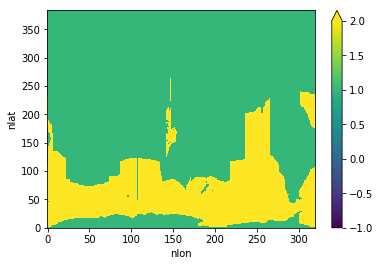

In [33]:
toe.plot(vmin=-1,vmax=2)

In [34]:
trend_year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054,
       2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065,
       2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076,
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087,
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100])

In [2]:
year = np.arange(1920,2101)/10.
year

array([ 192. ,  192.1,  192.2,  192.3,  192.4,  192.5,  192.6,  192.7,
        192.8,  192.9,  193. ,  193.1,  193.2,  193.3,  193.4,  193.5,
        193.6,  193.7,  193.8,  193.9,  194. ,  194.1,  194.2,  194.3,
        194.4,  194.5,  194.6,  194.7,  194.8,  194.9,  195. ,  195.1,
        195.2,  195.3,  195.4,  195.5,  195.6,  195.7,  195.8,  195.9,
        196. ,  196.1,  196.2,  196.3,  196.4,  196.5,  196.6,  196.7,
        196.8,  196.9,  197. ,  197.1,  197.2,  197.3,  197.4,  197.5,
        197.6,  197.7,  197.8,  197.9,  198. ,  198.1,  198.2,  198.3,
        198.4,  198.5,  198.6,  198.7,  198.8,  198.9,  199. ,  199.1,
        199.2,  199.3,  199.4,  199.5,  199.6,  199.7,  199.8,  199.9,
        200. ,  200.1,  200.2,  200.3,  200.4,  200.5,  200.6,  200.7,
        200.8,  200.9,  201. ,  201.1,  201.2,  201.3,  201.4,  201.5,
        201.6,  201.7,  201.8,  201.9,  202. ,  202.1,  202.2,  202.3,
        202.4,  202.5,  202.6,  202.7,  202.8,  202.9,  203. ,  203.1,
      

['phyla_hypox_cdf', 'phyla', '__version__', '__header__', '__globals__']
<xarray.Dataset>
Dimensions:      (o2bin: 400, phyla: 3)
Coordinates:
  * phyla        (phyla) object u'Crustacean' u'Fish' u'Mollusc'
  * o2bin        (o2bin) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 ...
Data variables:
    hypoxic_cdf  (phyla, o2bin) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...


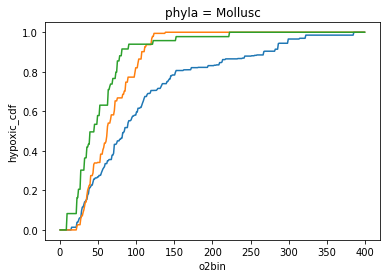

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr


plt.figure()
for i in range(3):
    mortality_thresholds.hypoxic_cdf[i,:].plot()
    
